#**Tema 2 - Sistema de Classifica√ß√£o Autom√°tica de Opini√µes de Clientes**

Intelig√™ncia Artificial V2


Dataset escolhido encontra-se no link: https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews?select=train.csv

#1. Defini√ß√£o do Escopo

#Amazon reviews

**Origem**

O conjunto de dados de avalia√ß√µes da Amazon consiste em avalia√ß√µes da Amazon. Os dados abrangem um per√≠odo de 18 anos, incluindo cerca de 35 milh√µes de avalia√ß√µes at√© mar√ßo de 2013. As avalia√ß√µes incluem informa√ß√µes do produto e do usu√°rio, classifica√ß√µes e o texto da avalia√ß√£o em formato simples. Para mais informa√ß√µes, consulte o seguinte artigo: J. McAuley e J. Leskovec. Hidden factors and hidden topics: understanding rating dimensions with review text. RecSys, 2013.

O conjunto de dados de polaridade das avalia√ß√µes da Amazon foi constru√≠do por Xiang Zhang (xiang.zhang@nyu.edu) a partir do conjunto de dados acima. Ele √© usado como um benchmark de classifica√ß√£o de texto no seguinte artigo: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advances in Neural Information Processing Systems 28 (NIPS 2015).

**Descri√ß√£o**

O conjunto de dados de polaridade das avalia√ß√µes da Amazon √© constru√≠do considerando as avalia√ß√µes com nota 1 e 2 como negativas, e as com nota 4 e 5 como positivas. As amostras com nota 3 s√£o ignoradas. No conjunto de dados, a classe 1 representa o negativo e a classe 2 representa o positivo.

Os arquivos train.csv e test.csv cont√™m todas as amostras de treinamento em formato de valores separados por v√≠rgula (CSV). Eles possuem 3 colunas, correspondendo ao √≠ndice da classe (1 ou 2), t√≠tulo da avalia√ß√£o e texto da avalia√ß√£o. O t√≠tulo e o texto da avalia√ß√£o s√£o delimitados por aspas duplas ("), e qualquer aspas dupla interna √© representada por duas aspas duplas consecutivas (""). Quebras de linha s√£o representadas por uma barra invertida seguida da letra "n", ou seja, "\n".

#2. Coleta e Organiza√ß√£o dos Dados



In [ ]:
#Importa√ß√£o de bibliotecas
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#carrega os arquivos
train_path = '/content/train.csv'
test_path = '/content/test.csv'

In [ ]:
# carregar ignorando linhas malformadas
df_train = pd.read_csv(train_path,
                       header=None,
                       names=['label', 'title', 'review'],
                       escapechar='\\',
                       engine='python',
                       on_bad_lines='skip')  # <- ESSENCIAL

df_test = pd.read_csv(test_path,
                      header=None,
                      names=['label', 'title', 'review'],
                      escapechar='\\',
                      engine='python',
                      on_bad_lines='skip')  # <- ESSENCIAL


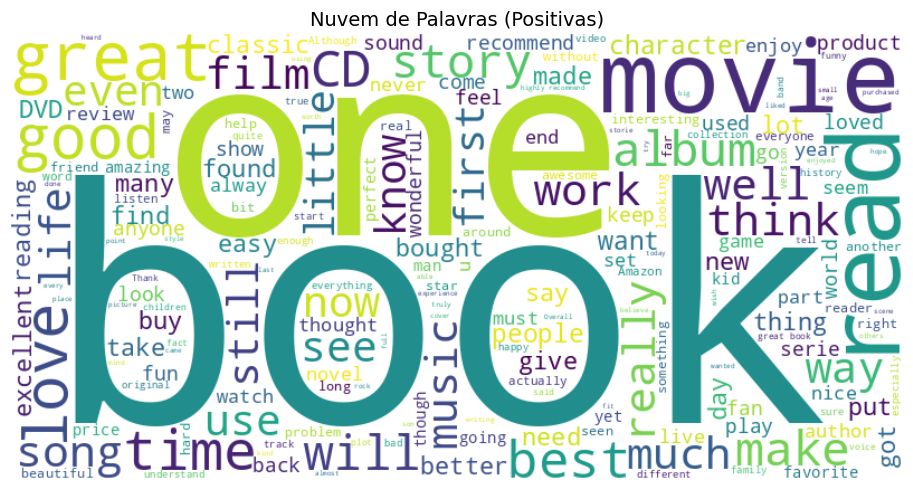

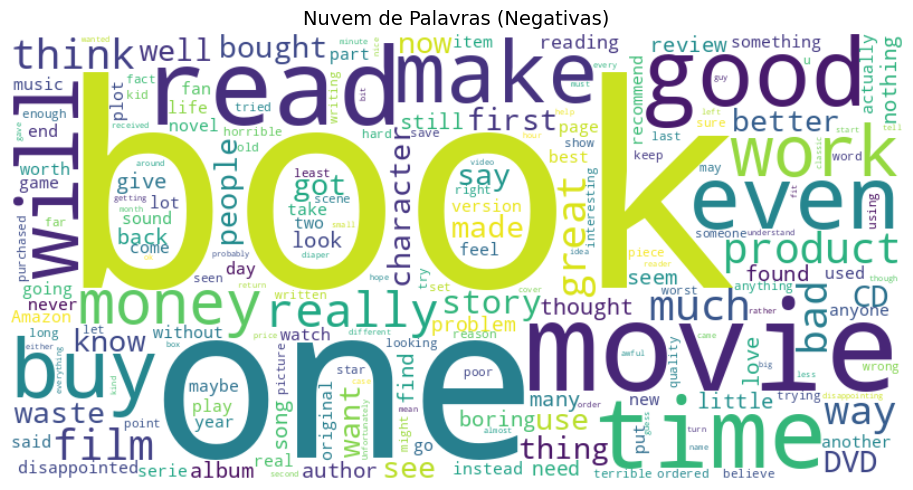

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords_en = set(STOPWORDS)

df_train['text'] = df_train['text'].fillna("")

for label, title in [(1, 'Positivas'), (0, 'Negativas')]:
    texto = " ".join(df_train[df_train['label'] == label]['text'].tolist())

    wc = WordCloud(
        background_color='white',
        stopwords=stopwords_en,
        width=800,
        height=400,
        colormap='viridis'
    ).generate(texto)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuvem de Palavras ({title})", fontsize=14)
    plt.tight_layout()
    plt.show()


In [ ]:
df_train['label'] = df_train['label'] - 1 #classifica√ß√£o bin√°ria (0 = negativo, 1 = positivo) do rotulo
df_test['label'] = df_test['label'] - 1


df_train['text'] = df_train['title'] + " " + df_train['review'] #junta titulo e a review em text
df_test['text'] = df_test['title'] + " " + df_test['review']

df_train = df_train[['text', 'label']] #finaliza deixando s√≥ as duas colunas de cima
df_test = df_test[['text', 'label']]

In [ ]:
df_train.head(30)

text  label
0   Stuning even for the non-gamer This sound trac...      1
1   The best soundtrack ever to anything. I'm read...      1
2   Amazing! This soundtrack is my favorite music ...      1
3   Excellent Soundtrack I truly like this soundtr...      1
4   Remember, Pull Your Jaw Off The Floor After He...      1
5   an absolute masterpiece I am quite sure any of...      1
6   Buyer beware This is a self-published book, an...      0
7   Glorious story I loved Whisper of the wicked s...      1
8   A FIVE STAR BOOK I just finished reading Whisp...      1
9   Whispers of the Wicked Saints This was a easy ...      1
10  The Worst! A complete waste of time. Typograph...      0
11  Great book This was a great book,I just could ...      1
12  Great Read I thought this book was brilliant, ...      1
13  Oh please I guess you have to be a romance nov...      0
14  Awful beyond belief! I feel I have to write to...      0
15  Don't try to fool us with fake reviews. It's g...      0
16  A romantic zen baseball comedy When you hear f...      1
17  Fashionable Compression Stockings! After I had...      1
18  Jobst UltraSheer Thigh High Excellent product....      1
19  sizes recomended in the size chart are not rea...      0
20  mens ultrasheer This model may be ok for seden...      0
21  Delicious cookie mix I thought it was funny th...      1
22  Another Abysmal Digital Copy Rather than scrat...      0
23  A fascinating insight into the life of modern ...      1
24  i liked this album more then i thought i would...      1
25  Problem with charging smaller AAAs I have had ...      0
26  Works, but not as advertised I bought one of t...      0
27  Disappointed I read the reviews,made my purcha...      0
28  Oh dear I was excited to find a book ostensibl...      0
29  Based on the reviews here I bought one and I'm...      1

In [ ]:
#Retorna o n√∫mero de linhas e o n√∫mero de colunas
print(df_train.head)
print(df_test.head)

<bound method NDFrame.head of                                                      text  label
0       Stuning even for the non-gamer This sound trac...      1
1       The best soundtrack ever to anything. I'm read...      1
2       Amazing! This soundtrack is my favorite music ...      1
3       Excellent Soundtrack I truly like this soundtr...      1
4       Remember, Pull Your Jaw Off The Floor After He...      1
...                                                   ...    ...
362387  Brush is not motorized, relies on suction to s...      0
362388  Not all its cracked up to be I expected more f...      0
362389  This thing really sucks! Very powerful when th...      1
362390  Dirt Devil 08225 I am happy with this product....      1
362391  junk! Very possiby the biggest waste of money ...      0

[362392 rows x 2 columns]>
<bound method NDFrame.head of                                                      text  label
0       Great CD My lovely Pat has one of the GREAT vo...      1
1 

In [ ]:
# Remover linhas com valores nulos
df_train = df_train.dropna(subset=['text'])
df_test = df_test.dropna(subset=['text'])


In [ ]:
print("Distribui√ß√£o dos r√≥tulos no df_train:")
print(df_train['label'].value_counts(), end="\n\n")

print("Distribui√ß√£o dos r√≥tulos no df_test:")
print(df_test['label'].value_counts())



Distribui√ß√£o dos r√≥tulos no df_train:
label
1    26272
0    25036
Name: count, dtype: int64

Distribui√ß√£o dos r√≥tulos no df_test:
label
1    30844
0    30087
Name: count, dtype: int64


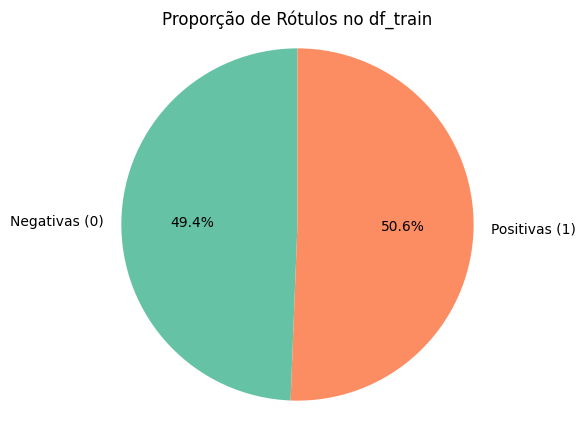

In [ ]:
import matplotlib.pyplot as plt
#balanceamento observa√ß√£o
labels = ['Negativas (0)', 'Positivas (1)']
values = [178947, 183445]

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=90)
plt.title('Propor√ß√£o de R√≥tulos no df_train')
plt.axis('equal')
plt.show()


#3. Pr√©-processamento de Texto



In [ ]:
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import multiprocessing
from sklearn.model_selection import train_test_split

#Inicializa stemmer (remove sufixos e prefixos) e stopwords Cria o stemmer, que reduz palavras para sua raiz.
#Define uma lista de stopwords (palavras comuns irrelevantes como "the", "is").
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    if not isinstance(text, str):
        return ""
    text = text.lower() #converte para min√∫sculas
    text = re.sub(r'[^a-z\s]', '', text) #remove pontua√ß√£o e n√∫meros
    tokens = text.split() #tokeniza (quebra o texto em palavras)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

def parallelize_apply(series, func): #acelera a situ do c√≥digo pq tava demorando muito
    num_cores = multiprocessing.cpu_count()
    results = Parallel(n_jobs=num_cores)(delayed(func)(text) for text in series)
    return results

X = df_train['text']
y = df_train['label']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) #define 20% pra teste, reprodutibilidade toda vez que rodar

# Pr√©-processa em paralelo
X_train_clean = parallelize_apply(X_train_raw, preprocess)
X_test_clean = parallelize_apply(X_test_raw, preprocess)

# Vetoriza√ß√£o TF-IDF
# Converte o texto limpo em vetores num√©ricos usando TF-IDF. Max 10k palavras como feature
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(X_train_clean) #vai pro treino
X_test = vectorizer.transform(X_test_clean) #vai pro teste


#5. Modelagem e Classifica√ß√£o


In [ ]:
import re
import time
import multiprocessing
from joblib import Parallel, delayed
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

#Dicion√°rio de modelos
modelos = {
    'Regress√£o Log√≠stica': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM (LinearSVC)': LinearSVC(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP (50,50,50)': MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=300, random_state=42)
}

#Treino e avalia√ß√£o com avalia√ß√£o de tempo (estava demorando muito)
for nome, modelo in modelos.items():
    print(f"\nTreinando modelo: {nome}")
    start = time.time()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    tempo = time.time() - start
    print(f"Tempo de treino + previs√£o: {tempo:.2f} segundos")
    print(f"Acur√°cia ({nome}): {accuracy_score(y_test, y_pred):.4f}")
    print("Relat√≥rio de Classifica√ß√£o:")
    print(classification_report(y_test, y_pred, target_names=["Negativo", "Positivo"]))



Treinando modelo: Regress√£o Log√≠stica
Tempo de treino + previs√£o: 0.19 segundos
Acur√°cia (Regress√£o Log√≠stica): 0.8704
Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

    Negativo       0.87      0.86      0.87      3203
    Positivo       0.87      0.88      0.87      3349

    accuracy                           0.87      6552
   macro avg       0.87      0.87      0.87      6552
weighted avg       0.87      0.87      0.87      6552


Treinando modelo: Random Forest
Tempo de treino + previs√£o: 56.24 segundos
Acur√°cia (Random Forest): 0.8446
Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

    Negativo       0.85      0.83      0.84      3203
    Positivo       0.84      0.85      0.85      3349

    accuracy                           0.84      6552
   macro avg       0.84      0.84      0.84      6552
weighted avg       0.84      0.84      0.84      6552


Treinando modelo: SVM (LinearSVC)
Tempo de tre

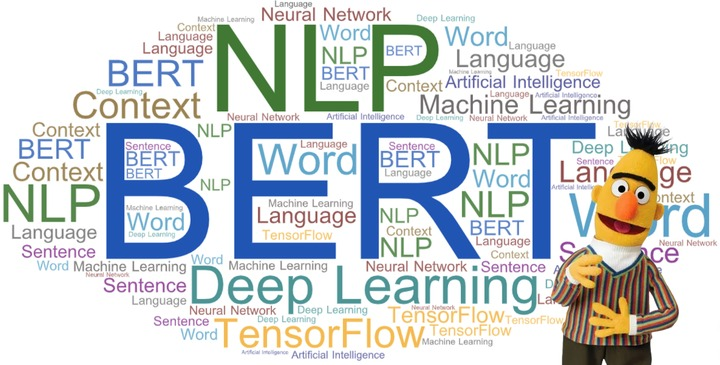

In [ ]:
!pip install -q transformers

from transformers import pipeline
from sklearn.metrics import accuracy_score, classification_report

bert = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

df_sample = df_test.sample(500, random_state=42)

texts = df_sample['text'].tolist()
bert_preds = bert(texts)

# Extrair estrelas (ex: "4 stars") e converter para bin√°rio
bert_star_labels = [int(p['label'][0]) for p in bert_preds] #1 ‚Üí positivo (4 ou 5 estrelas) #0 ‚Üí negativo (1, 2 ou 3 estrelas)
bert_binary = [1 if star > 3 else 0 for star in bert_star_labels]

# Converter r√≥tulos reais para bin√°rio (0 ou 1)
true_labels = df_sample['label'].apply(lambda x: 1 if x == 1 else 0)

# Avaliar o modelo BERT
print("üìä BERT ‚Äî Acur√°cia:", accuracy_score(true_labels, bert_binary))
print("\nüìÑ Relat√≥rio de Classifica√ß√£o:")
print(classification_report(true_labels, bert_binary, target_names=["Negativo", "Positivo"]))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


üìä BERT ‚Äî Acur√°cia: 0.926

üìÑ Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

    Negativo       0.91      0.96      0.93       274
    Positivo       0.95      0.88      0.91       226

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.92       500
weighted avg       0.93      0.93      0.93       500



In [ ]:
print(y_test.value_counts())


label
1    3349
0    3203
Name: count, dtype: int64


**BERT Accuracy: 0.9**

#6: Simular novos reviews para o modelo classificar.



In [ ]:
print(np.unique(y_train))


[0 1]


In [ ]:
def predict_sentiment(texto, modelo_lr, vectorizer):
    texto_preproc = preprocess(texto)
    texto_vec = vectorizer.transform([texto_preproc])
    pred = modelo_lr.predict(texto_vec)[0]
    return "Positivo" if pred == 1 else "Negativo"


In [ ]:
def predict_sentiment(texto, modelo_lr, vectorizer):
    if not texto or not isinstance(texto, str):
        return "Texto inv√°lido"

    texto_preproc = preprocess(texto)
    texto_vec = vectorizer.transform([texto_preproc])

    pred = modelo_lr.predict(texto_vec)[0]
    return "Positivo" if pred == 1 else "Negativo"


In [ ]:
print(predict_sentiment("This product is amazing!", modelos['Regress√£o Log√≠stica'], vectorizer))
print(predict_sentiment("Terrible quality, not worth it.", modelos['Regress√£o Log√≠stica'], vectorizer))


Positivo
Negativo


In [ ]:
from sklearn.linear_model import LogisticRegression
import joblib

modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train, y_train)

joblib.dump(modelo_lr, 'modelo_lr.joblib')

joblib.dump(vectorizer, 'vectorizer.joblib')

print("Modelo e vetorizer salvos com sucesso!")


Modelo e vetorizer salvos com sucesso!
